In [34]:
import pandas as pd
df=pd.read_csv('C:/Users/Dell/OneDrive/Documentos/GitHub/Ent_DS/Ent_3/DataScience_salaries_2024.csv' ,sep=',')

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [36]:
df.shape

(14838, 11)

In [37]:
df['job_title']

0                         Data Scientist
1                        BI Data Analyst
2                         Data Scientist
3                            ML Engineer
4         Lead Machine Learning Engineer
                      ...               
14833    Business Intelligence Developer
14834                 Staff Data Analyst
14835         Machine Learning Developer
14836                       Data Analyst
14837                        ML Engineer
Name: job_title, Length: 14838, dtype: object

In [38]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### **Univariados**
1. Analisis de salarios
2. Residencia del Empleado, Ubicacion de la compañia, nivel de  experencia, tamaño de la compañia
3. Tipo de empleo
4. Titulo profesional
5. pais con salario mas alto y titulo (Pendiente)

#### **Bivariado**
##### **Categoria vs numeros**
1. Salario vs Titulo profesional
2. Salario Vs Nivel de experencia
3. Salario Vs Ubicacion de la compañia
4. Salario vs REsidencia del empleado
5. Salario vs tamaño de la compañia
6. Año de comtratacion vs salario

#### **Categoria Vs Categoria**
1. Nivel de experencia vs Titulo profesional
2. Ubicacion de la compañia Vs Residencia del empleado
3. Tirulo profecional Vs ubicacion de la compañia






In [39]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Histograma de Salario')

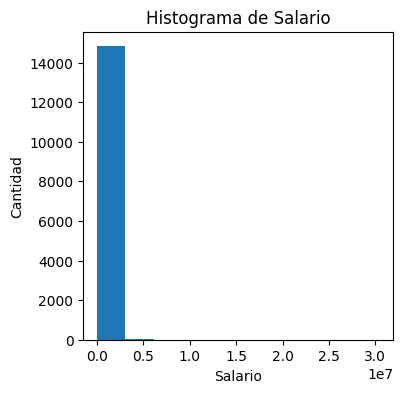

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(x= df.salary, density=False, orientation='vertical')
ax.set_xlabel('Salario')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de Salario')

Text(0.5, 1.0, 'Distribucion Experencia')

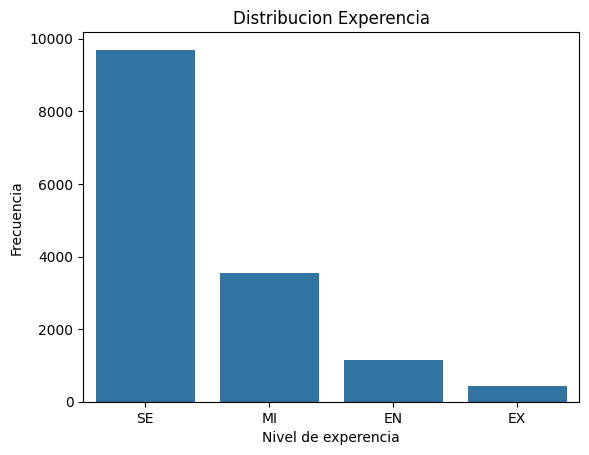

In [44]:
import seaborn as sns 
serie=df['experience_level'].value_counts()
sns.barplot(x= serie.index, y= serie.values)
plt.xlabel('Nivel de experencia')
plt.ylabel('Cantidad')
plt.title('Distribucion Experencia')

(array([1.4815e+04, 1.5000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.40000e+04, 3.05260e+06, 6.09120e+06, 9.12980e+06, 1.21684e+07,
        1.52070e+07, 1.82456e+07, 2.12842e+07, 2.43228e+07, 2.73614e+07,
        3.04000e+07]),
 <BarContainer object of 10 artists>)

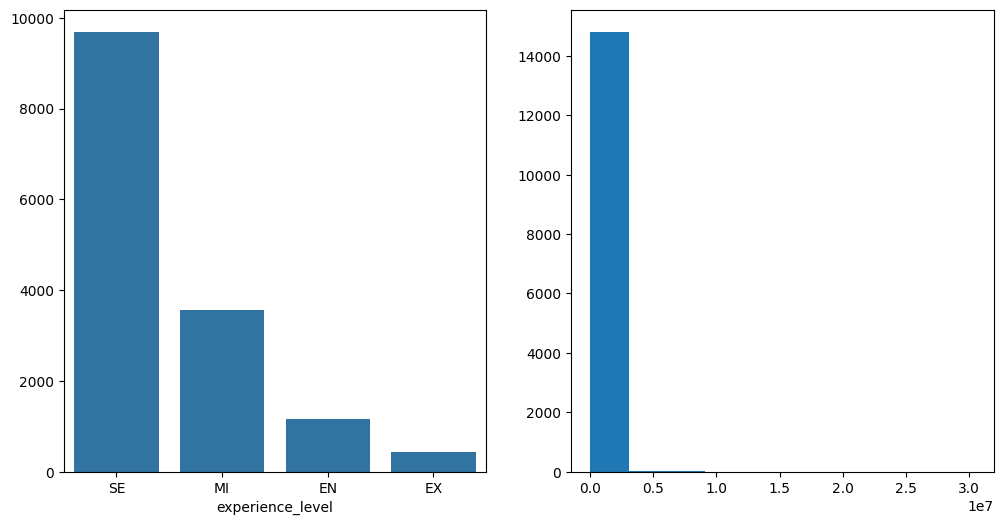

In [46]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.barplot(x= serie.index, y= serie.values, ax=ax[0])
ax[1].hist(x= df.salary, density=False, orientation='vertical')

Text(0.5, 1.0, 'Conteo tipo de empleo')

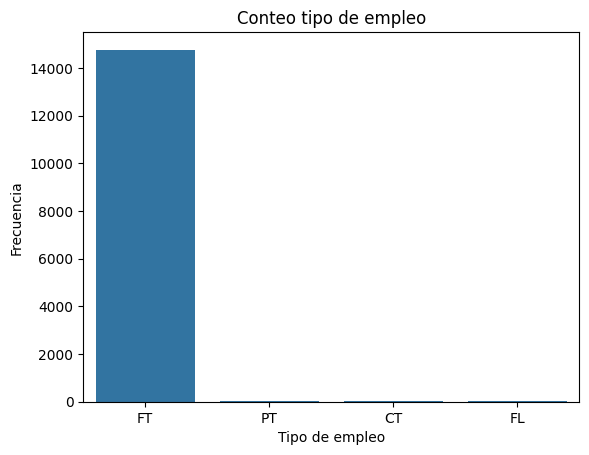

In [49]:
serie_f=df['employment_type'].value_counts()
sns.barplot(x= serie_f.index, y= serie_f.values)
plt.xlabel('Tipo de empleo')
plt.ylabel('Frecuencia')
plt.title('Conteo tipo de empleo')

In [65]:
(df['company_size'].str.lower().value_counts()/df.shape[0])*100

company_size
m    92.155277
l     6.624882
s     1.219841
Name: count, dtype: float64

<Axes: title={'center': 'Porcentaje tamaño de la compañia'}, xlabel='Tamaño', ylabel='Porcentaje (%)'>

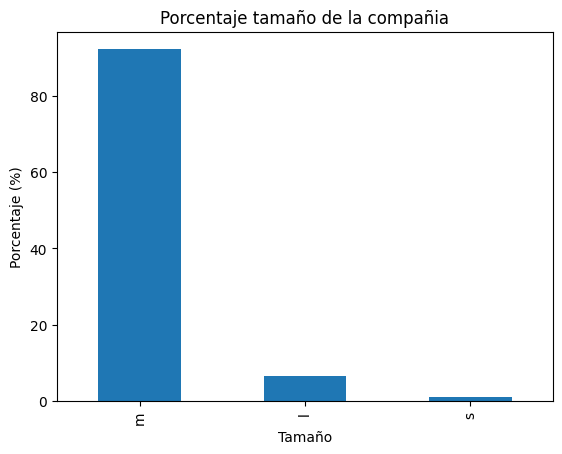

In [70]:
#data['company_size'].str.lower().value_counts().plot(kind='bar')
serie_t=(df['company_size'].str.lower().value_counts()/df.shape[0])*100
serie_t.plot(kind='bar', xlabel='Tamaño',ylabel='Porcentaje (%)',title='Porcentaje tamaño de la compañia')

In [73]:
df['company_location'].value_counts()[0:10]

company_location
US    12975
GB      655
CA      392
ES      127
DE       98
FR       61
IN       59
AU       53
NL       28
PT       28
Name: count, dtype: int64

<Axes: xlabel='company_location'>

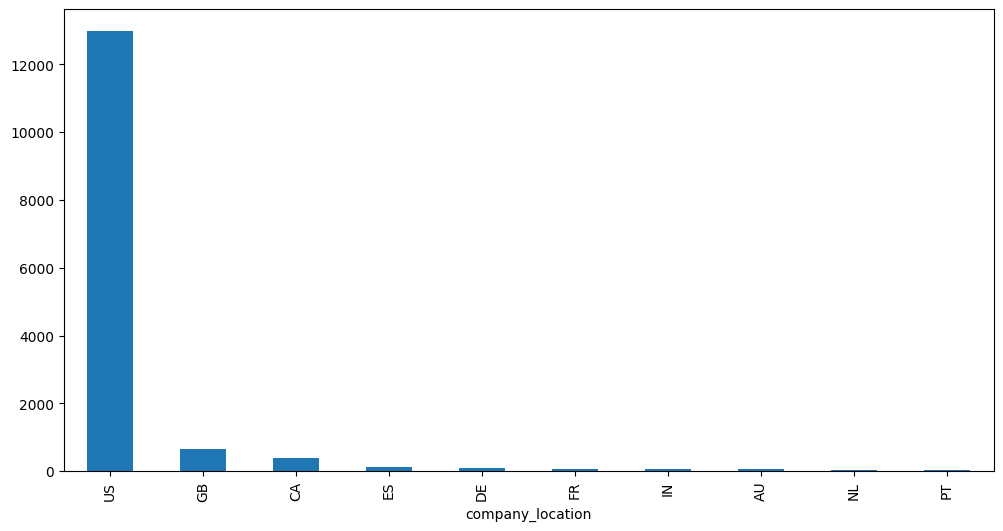

In [74]:
df['company_location'].value_counts()[0:10].plot(kind='bar',figsize=(12,6))

In [77]:
df['work_year']

0        2021
1        2021
2        2020
3        2021
4        2022
         ... 
14833    2022
14834    2020
14835    2021
14836    2022
14837    2020
Name: work_year, Length: 14838, dtype: int64

<Axes: title={'center': 'Evolucion temporal de contrataciones'}, xlabel='Año', ylabel='Cantidad contrataciones'>

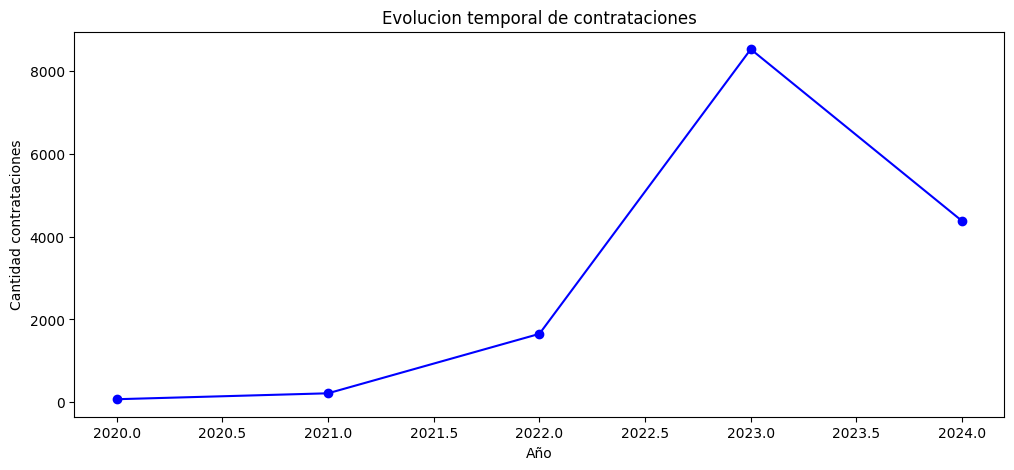

In [106]:

df.groupby(by='work_year').count()['salary_in_usd'].plot(kind='line',marker='o',\
                                                      color='Blue',xlabel='Año',\
                                                      ylabel='Cantidad contrataciones',\
                                                      title='Evolucion temporal de contrataciones',\
                                                      figsize=(12,5))

Text(0.5, 1.0, 'Salario vs Posicion')

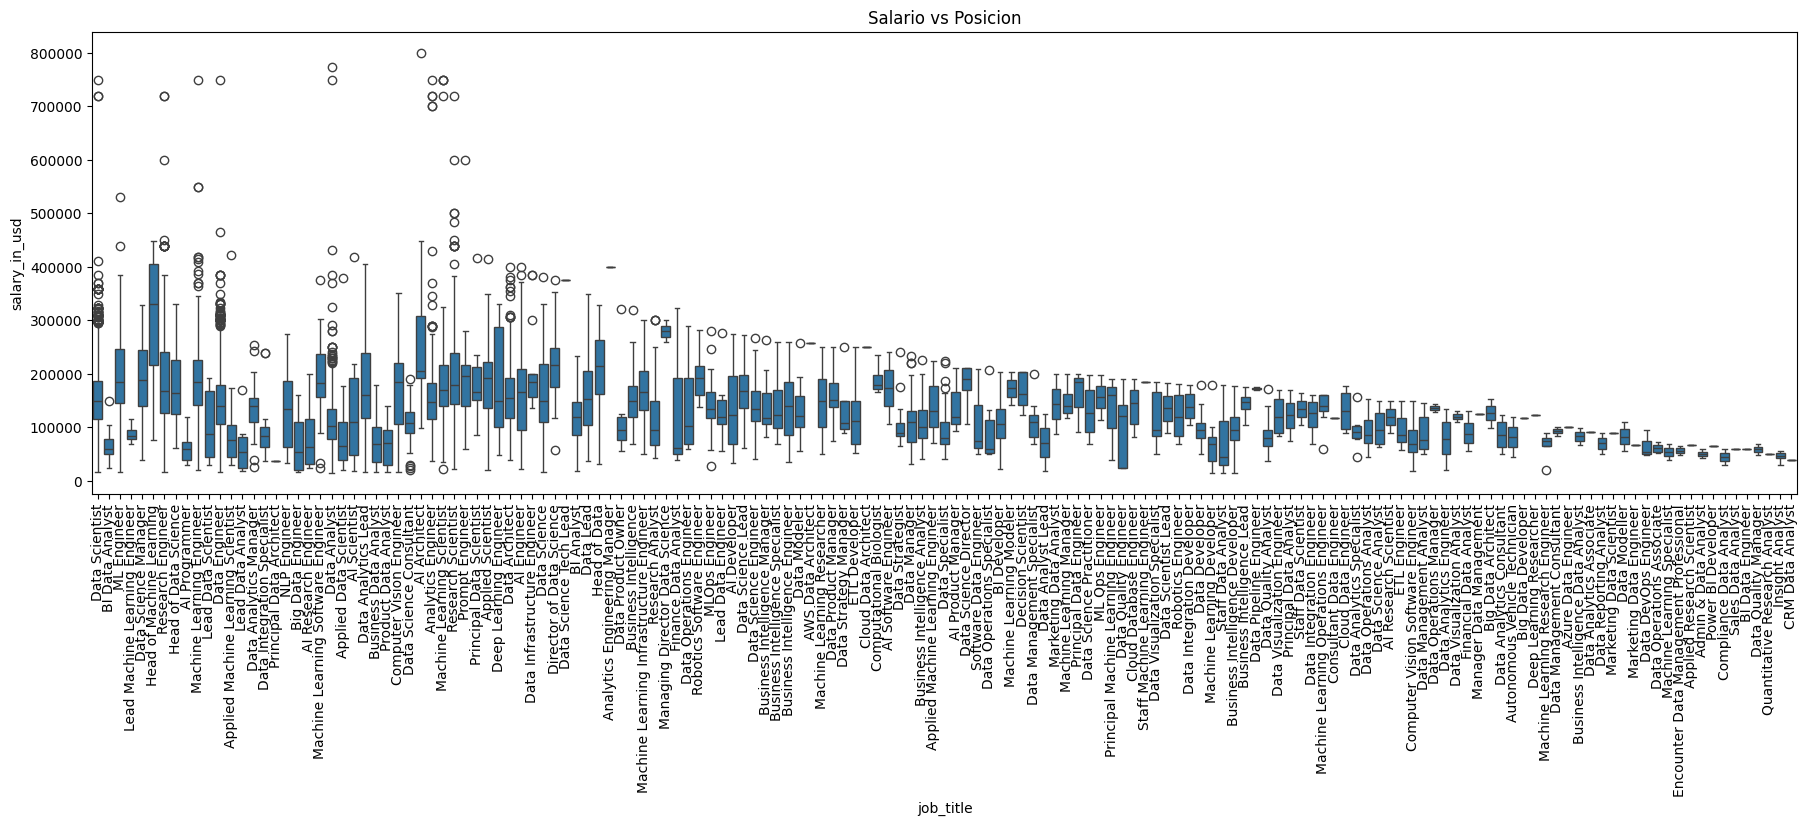

In [109]:
plt.figure(figsize=(22,6))
sns.boxplot(data=df, x='job_title',y='salary_in_usd')
plt.xticks(rotation=90)
plt.title('Salario vs Posicion')

Text(0.5, 1.0, 'Salario vs Experencia')

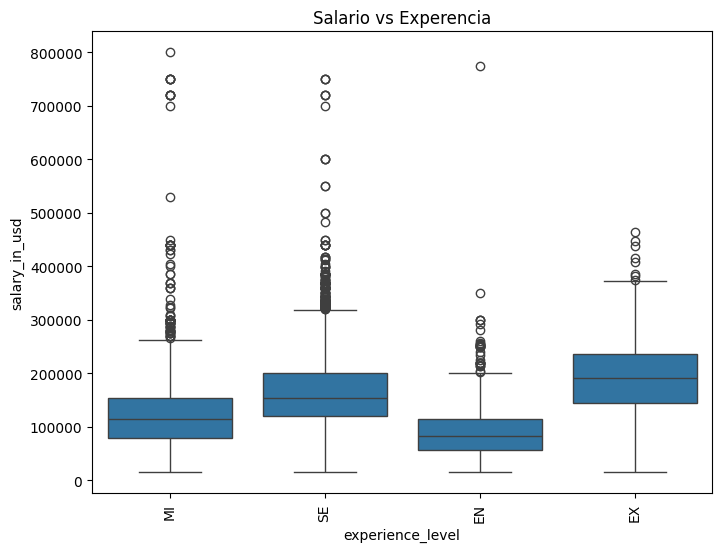

In [110]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='experience_level',y='salary_in_usd')
plt.xticks(rotation=90)
plt.title('Salario vs Experencia')

In [118]:
df[['experience_level','salary_in_usd']].groupby(by='experience_level').describe()

salary_in_usd                                        \
                         count           mean           std      min   
experience_level                                                       
EN                      1148.0   91656.841463  52202.978768  15000.0   
EX                       441.0  194730.210884  71668.466597  15000.0   
MI                      3553.0  125386.553054  68648.034971  15000.0   
SE                      9696.0  163700.967100  64048.246208  15809.0   

                                                           
                        25%       50%       75%       max  
experience_level                                           
EN                 57294.25   83000.0  115000.0  774000.0  
EX                144540.00  191857.0  236000.0  465000.0  
MI                 80000.00  114800.0  154800.0  800000.0  
SE                120250.00  155000.0  200000.0  750000.0

In [121]:
pd.crosstab(df.experience_level,df.company_location)

company_location,AD,AE,AM,AR,AS,AT,AU,BA,BE,BR,...,SA,SE,SG,SI,TH,TR,UA,US,VN,ZA
experience_level,,,,,,,,,,,,,,,,,,,,,
EN,0,0,0,1,3,1,12,1,2,3,...,0,2,1,0,1,2,1,869,0,2
EX,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,388,0,0
MI,1,1,1,0,0,8,27,1,1,9,...,2,0,4,5,1,2,0,2868,4,5
SE,0,4,0,6,0,1,14,0,1,7,...,1,1,0,1,1,2,9,8850,0,8
